# Brief Introduction to PyTorch

In this notebook, we will introduce some basical usage of PyTorch. You can get familiar with PyTorch by reading from start. In the end you have to complete some codes and submit them.

## Environment
To running this code, you have to prepare a python environment. We recommend python version >= 3.8. You will need to install `torch`, `numpy` and `jupyter` packages. And in order to run the tests locally, you also need to install `scikit-learn` and `matplotlib`.

In [27]:
import torch
import numpy as np

## Data Type (Tensor)
The math operations in PyTorch is based on Tensors, just like most of the operations in numpy is based on numpy arrays. In practical usage, tensors are similar to arrays in numpy, which can represent matrics of high dimensions. For example, a tensor can be used to represent not only a one-bit array, but also a two-dimensional matrix and an image with rgb3 channels.

### Tensor Creation

There are a few ways to create tensors in PyTorch, the easiest way is to create from a Python List.

In [28]:
a = torch.tensor([[1,2,3], [4,5,6]])
print(a)

tensor([[1, 2, 3],
        [4, 5, 6]])


We can also create a tensor from a numpy array.

In [29]:
b_array = np.array([[6,5,4], [3,2,1]])
b = torch.from_numpy(b_array)
print(b)

tensor([[6, 5, 4],
        [3, 2, 1]])


Similar to numpy, we can create some special values directly.

In [30]:
rand_v = torch.rand(size=(2, 3), dtype=torch.float32)
ones_v = torch.ones(size=(2, 3), dtype=torch.float32)
zeros_v = torch.zeros(size=(2,3), dtype=torch.float32)
diag_v = torch.eye(3, dtype=torch.float32)

print(rand_v)
print(ones_v)
print(zeros_v)
print(diag_v)

tensor([[0.2168, 0.3827, 0.5714],
        [0.3131, 0.5749, 0.1092]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### Tensor Operation

We can index tensors in a similar way to numpy.

In [31]:
a = torch.tensor([[1,2,3], [4,5,6]])

print(a)

print(a[:, 2])

print(a[1, 2])

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([3, 6])
tensor(6)


Tensors also support many arithmetic operations similar to numpy.

In [32]:
# Create a 2x3 tensor
a = torch.tensor([[1,2,3], [4,5,6]])
a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [33]:
# Elementwise addition and multiplication with a constant number
a = a + 2
print(a)

a = a * 3
print(a)

tensor([[3, 4, 5],
        [6, 7, 8]])
tensor([[ 9, 12, 15],
        [18, 21, 24]])


In [34]:
# Elementwise multiplication between two tensors
a = torch.ones(size=(3, 3)) * 2
b = torch.ones(size=(3, 3)) * 3
c = a * b
print(c)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])


In [35]:
# Matrix multiplication
a = torch.tensor([[1, 2], [3, 4]])
print(a)
b = torch.tensor([[5, 6], [7, 8]])
print(b)
c = torch.matmul(a, b)
print(c)

tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
tensor([[19, 22],
        [43, 50]])


In [36]:
# Matrix multiply vector
a = torch.tensor([[1, 2], [3, 4]])
print(a)
v = torch.tensor([6, 7])
print(v)
c = torch.matmul(a, v)
print(c)

tensor([[1, 2],
        [3, 4]])
tensor([6, 7])
tensor([20, 46])


## Assignment Task 1 (5 points)
Complete a function that returns a diagonal matrix of dtype torch.float32, and the values on the diagonal are all the same as the input value x.

In [37]:
#export
import torch
### DO NOT CHANGE ANY CODE ABOVE THIS LINE IN THIS CELL ###
def diag_matrix(n, x):
    # TODO: complete this function, return a tensor with the shape n x n, and the values on the diagonal are all x, all other values are zero
    matrix = torch.zeros(n, n)
    matrix.fill_diagonal_(x)
    return matrix

## Matrix Operation
In PyTorch, 2D tensors can be viewed as matrices. And torch supports some common operations on matrices.

### Inverse Matrix and Pseudoinverse Matrix
Pytorch supports operations to find the inverse and pseudoinverse of a matrix.

In [38]:
# inverse of a matrix
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
a_inv = torch.linalg.inv(a)
print("A x A':")
print(torch.matmul(a, a_inv))

# pseudoinverse of a matrix
b = torch.rand(size=(2, 2), dtype=torch.float32)
b_pinv = torch.linalg.pinv(b)
print("B x pinv(B)")
print(torch.matmul(b, b_pinv))

A x A':
tensor([[1., 0.],
        [0., 1.]])
B x pinv(B)
tensor([[ 1.0000e+00, -7.1526e-07],
        [ 2.3842e-07,  1.0000e+00]])


### Transpose of a matrix
Pytorch supports transpose operation for 2D tensor

In [39]:
# transpose of a matrix
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print(a)
a_T = torch.t(a)
print(a_T)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 3.],
        [2., 4.]])


### Concatenate matrices
You can concatenate multiple matrices using PyTorch.

In [40]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
c = torch.cat((a, b), dim=1)
print(c)
d = torch.cat((a, b), dim=0)
print(d)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


## Assignment Task 2 (13 points)
We have learnt about linear regression and ordinary least squares (OLS) in class. Now we can use OLS to do linear regression. Basically you can solve linear regression with any library that supports matrix operations, including PyTorch.

The given data will include a 2d matrix X and a 1d tensor Y. Every row of X represents features of one data point and every value in Y represents the target value. For one data point $(x_1, x_2, ..., x_n)$, you can predict the target by $y = \theta_0 * 1 + \theta_1  x_1 + \theta_2  x_2 + ... + \theta_n  x_n$. It should be noted that you should add a constant term here.

In class we have analyzed that gradient $\nabla_{\theta} J(\theta) = (X^T X) \theta - X^T y$. In order to minimize the cost we have the optimal $\theta^{*} = (X^T X)^{-1} X^T y$

Complete the following class for linear regression. Complete both the `fit()` function and the `predict` function.
You can add member variables to this class freedomly. You are not allowed to use any other third-party libraries other than pytorch.

Also please note that the data we will use in the online tests are different from the data used in the local test. **Do not** rely on the patterns of the local test data.

In [41]:
#export
import torch
### DO NOT CHANGE ANY CODE ABOVE THIS LINE IN THIS CELL ###
class LinearRegression:
    def __init__(self, fit_intercept=True):
        """
        @param fit_intercept: Whether to calculate the intercept for this model.
        If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
        """
        self.fit_intercept = fit_intercept
        self.theta = None

    def fit(self, X, Y):
        """
        @param X: X is a tensor with shape m x n. Every row of X represents the features of a data point.
        @param Y: Y is a 1d tensor with length n. Every value of Y is the target value.
        """
        m = X.shape[0]
        assert(m == Y.shape[0])
        # Add constant terms if set
        if self.fit_intercept:
            constants = torch.ones(size=(m, 1), dtype=X.dtype)
            new_X = torch.cat((X, constants), dim=1)
        else:
            new_X = X
        new_X_T = torch.t(new_X)
        # TODO: Complete the training of the linear regression model.
        self.theta = torch.inverse(new_X_T @ new_X) @ new_X_T @ Y

    def predict(self, X):
        """
        @param X: X is a tensor with shape k x n
        @return: the Y you should return is a 1d tensor with length n
        """
        # TODO: Complete this function to predict Y based on X.
        if self.fit_intercept:
          constants = torch.ones(X.shape[0], 1, dtype=X.dtype)
          X = torch.cat((X, constants), dim=1)
        return X @ self.theta

######################################################################
########## DON'T WRITE ANY CODE OUTSIDE THE CLASS! ###################
######## IF YOU WANT TO CALL OR TEST IT CREATE A NEW CELL ############
######################################################################

In [42]:
# Local test of the LinearRegression
import sklearn
from sklearn import datasets
from sklearn import metrics

# load a toy data set from sklearn
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

data_num = X.shape[0]
feature_num = X.shape[1]
train_ratio = 0.8
train_num = int(data_num * train_ratio)
new_index = np.arange(data_num)
X_mat = torch.tensor(X.to_numpy().astype(np.float32))
y = torch.tensor(y.astype(np.float32))
np.random.shuffle(new_index)
X_mat = X_mat[new_index]
y = y[new_index]
train_X = X_mat[:train_num,:]
train_Y = y[:train_num]
test_X = X_mat[train_num:,:]
test_Y = y[train_num:]

l_reg = LinearRegression()
l_reg.fit(train_X, train_Y)
pred_train_y = l_reg.predict(train_X)
pred_test_y = l_reg.predict(test_X)

train_mse = metrics.mean_squared_error(train_Y, pred_train_y)
test_mse = metrics.mean_squared_error(test_Y, pred_test_y)
train_r2 = metrics.r2_score(train_Y, pred_train_y)
test_r2 = metrics.r2_score(test_Y, pred_test_y)
print("train mse:", train_mse, ", test mse:", test_mse)
print("train r2:", train_r2, ", test r2: ", test_r2)

train mse: 3016.705 , test mse: 2292.5107
train r2: 0.5119311579313763 , test r2:  0.5353845164645784


## Assignment Task 3 (7 points)

Now, suppose we are not able to obtain all the features we want from datasets.
We are only able to obtain their one feature, for example, "bmi" to predict the target.

This is an example of how to implement non-linear relationships of bmi and disease progression.
Here, we use $ bmi, bmi^2, bmi^3 $ as our new features.

We can solve the regression of $ y = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3$

We will give you a vector $x$. You need to make a matrix $X = [ x^1, x^2, x^3 ]$. Use the matrix $X$
as the new features.

In [43]:
#export
import torch
### DO NOT CHANGE ANY CODE ABOVE THIS LINE IN THIS CELL ###
def generate_non_linear_features(x):
    """
    @param x: 1d tensor with length n, every value represents a data point. Every data point has only one feature.
    @return: n x 3 tensor, every row of this matrix represents the new features of this data point. A data point x_k in x should have features [x_k, x_k^2, x_k^3]
    """
    # TODO: Complete this function.
    if x.ndim == 1:
        x = x.unsqueeze(1)
    x_squared = x ** 2
    x_cubed = x ** 3
    X = torch.cat([x, x_squared, x_cubed], dim=1)
    return X

In [44]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

data_num = X.shape[0]
# feature_num = X.shape[1]
train_ratio = 0.8
train_num = int(data_num * train_ratio)
new_index = np.arange(data_num)

X = X['bmi']
X_vec = torch.tensor(X.to_numpy().astype(np.float32))
y = torch.tensor(y.astype(np.float32))
np.random.shuffle(new_index)
X_vec = X_vec[new_index]
X_mat = generate_non_linear_features(X_vec)
print(X_mat.shape)
y = y[new_index]
train_X = X_mat[:train_num,:]
train_Y = y[:train_num]
test_X = X_mat[train_num:,:]
test_Y = y[train_num:]

l_reg = LinearRegression()
l_reg.fit(train_X, train_Y)
pred_train_y = l_reg.predict(train_X)
pred_test_y = l_reg.predict(test_X)

train_mse = metrics.mean_squared_error(train_Y, pred_train_y)
test_mse = metrics.mean_squared_error(test_Y, pred_test_y)
train_r2 = metrics.r2_score(train_Y, pred_train_y)
test_r2 = metrics.r2_score(test_Y, pred_test_y)
print("train mse:", train_mse, ", test mse:", test_mse)
print("train r2:", train_r2, ", test r2: ", test_r2)

torch.Size([442, 3])
train mse: 3797.898 , test mse: 4314.5117
train r2: 0.37179493271669395 , test r2:  0.2042954150027797


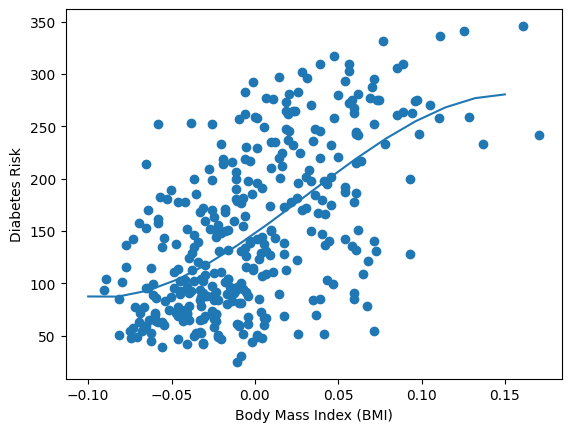

In [45]:
# Show the learned polynomial curve
import matplotlib.pyplot as plt
x_line = np.linspace(-0.1, 0.15, 15, dtype=np.float32)
x_line_p3 = torch.tensor(np.stack([x_line, x_line**2, x_line**3], axis=1))
y_train_pred = l_reg.predict(x_line_p3)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_vec[:train_num], y[:train_num])
plt.plot(x_line, y_train_pred)

## Submission
Ensure you've thoroughly tested your code locally before submitting it for evaluation. Your submission to Gradescope should be a zip file containing specific files related to your solution and the trained models.

### Submission Checklist:

Ensure your zip file contains the following items:

1. `hw1_torch_intro.ipynb`: The torch jupyter notebook containing all your code and answers.
2. `hw1_reg.ipynb`: The regression jupyter notebook, which is the other part of this homework and should include your code.

### Submission Instructions:

- **File Format**: Submit all your files in a **ZIP** format.
- **File Structure**: Avoid including a root directory in the zip file. Ensure all your files are compressed directly without a containing folder.
- **Validation**: Before submitting, verify your code runs as expected and all outputs align with anticipated results.

**IMPORTANT**: Please **do not** include a root directory in the zip file. The files should be compressed directly.